# Model1 - Implement and train a base model
This is the model we worked on during the lab, with a very basic CNN architecture and average results.



## Load modules

In [47]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

import helpers
import importlib
importlib.reload(helpers)

## Load dataset

In [48]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

170498071/170498071 [==============================] - 2s 0us/step


## Build Model

In [50]:
input_shape = x_test.shape[1:]

model = Sequential()

model.add(Input(shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               2

2024-09-26 07:27:41.529788: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 07:27:41.630353: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-26 07:27:41.630571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [51]:
# compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(
    x_train, y_train, 
    batch_size=512, 
    epochs=15, 
    validation_split=0.1
)


Epoch 1/15


2024-09-26 07:27:46.400743: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-26 07:27:47.616349: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f33e6816d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-26 07:27:47.616385: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
I0000 00:00:1727335667.678684     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - 5s 15ms/step - loss: 2.2962 - accuracy: 0.1464 - val_loss: 2.2899 - val_accuracy: 0.1674
Epoch 2/15
88/88 [==============================] - 1s 8ms/step - loss: 2.2815 - accuracy: 0.1874 - val_loss: 2.2721 - val_accuracy: 0.2058
Epoch 3/15
88/88 [==============================] - 1s 8ms/step - loss: 2.2581 - accuracy: 0.2098 - val_loss: 2.2402 - val_accuracy: 0.2056
Epoch 4/15
88/88 [==============================] - 1s 8ms/step - loss: 2.2152 - accuracy: 0.2238 - val_loss: 2.1832 - val_accuracy: 0.2236
Epoch 5/15
88/88 [==============================] - 1s 8ms/step - loss: 2.1439 - accuracy: 0.2398 - val_loss: 2.1027 - val_accuracy: 0.2388
Epoch 6/15
88/88 [==============================] - 1s 8ms/step - loss: 2.0602 - accuracy: 0.2644 - val_loss: 2.0243 - val_accuracy: 0.2744
Epoch 7/15
88/88 [==============================] - 1s 8ms/step - loss: 1.9928 - accuracy: 0.2927 - val_loss: 1.9700 - val_accuracy: 0.2812
Epoch 8/15
88/88 [============

313/313 [==============================] - 1s 2ms/step - loss: 1.7287 - accuracy: 0.3915
Model Loss: 1.7287003993988037
Model Accuracy: 0.39149999618530273


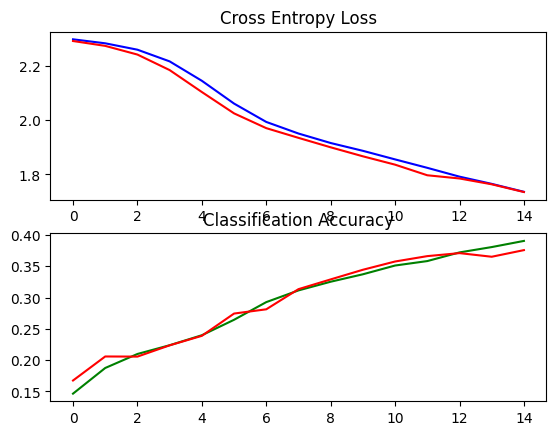

313/313 [==============================] - 0s 1ms/step


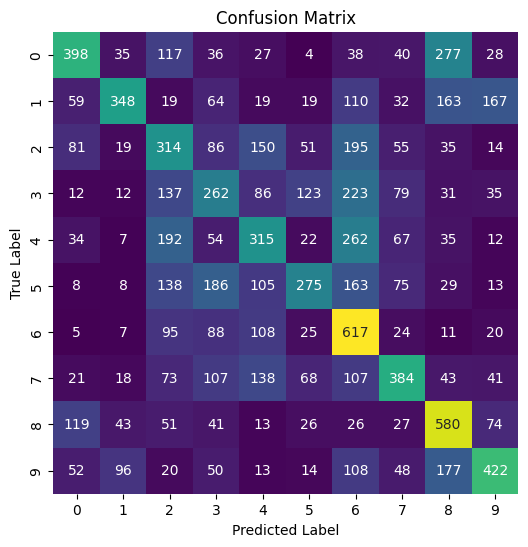

In [53]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

## Conclusion
The confusion matrix shows a poor distribution around the main diagonal and the accuracy is barely above 50%, clearly showing that our base model is not complex enough to capture the similarities of the different classes.

In [54]:
from keras.backend import clear_session
clear_session()